# Breast Cancer (Malignant/Benign Tumor) Prediction

In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from implementations_from_scratch.logistic_regression_from_scratch import LogisticRegression as LR_from_scratch

## Data Preprocessing

In [3]:
# Import data
dataset = pd.read_csv("../datasets/breast_cancer_wisconsin_diagnostic.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# Remove unnecessary columns and encode target labels to values 0 and 1
dataset.drop(columns=['id', 'Unnamed: 32'], inplace=True)
dataset['diagnosis'] = [1 if sample == 'M' else 0 for sample in dataset.diagnosis]
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


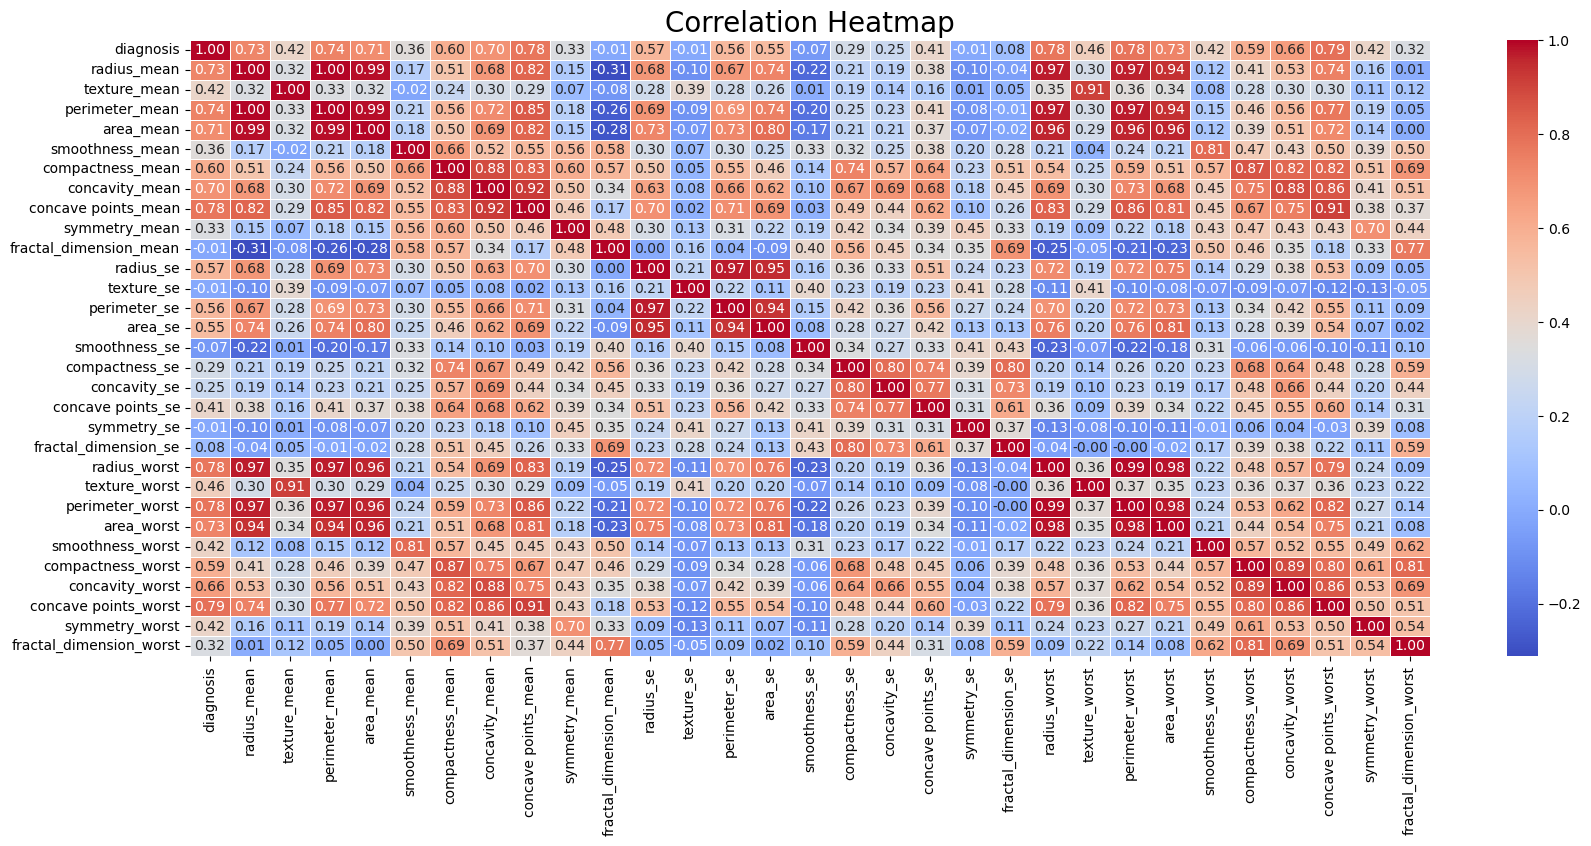

In [7]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

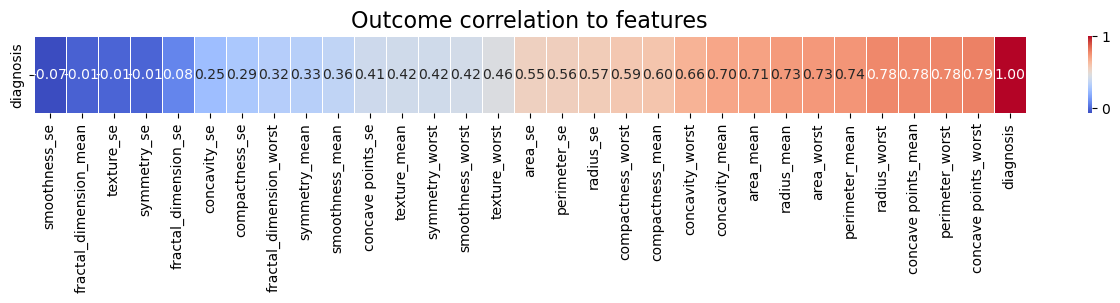

In [8]:
# Correlation for "diagnosis"
diagnosis_corr = pd.DataFrame(dataset.corr()['diagnosis'].sort_values(ascending=True))
plt.figure(figsize=(16, 1))
sns.heatmap(diagnosis_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Outcome correlation to features", fontsize=16)
plt.show()

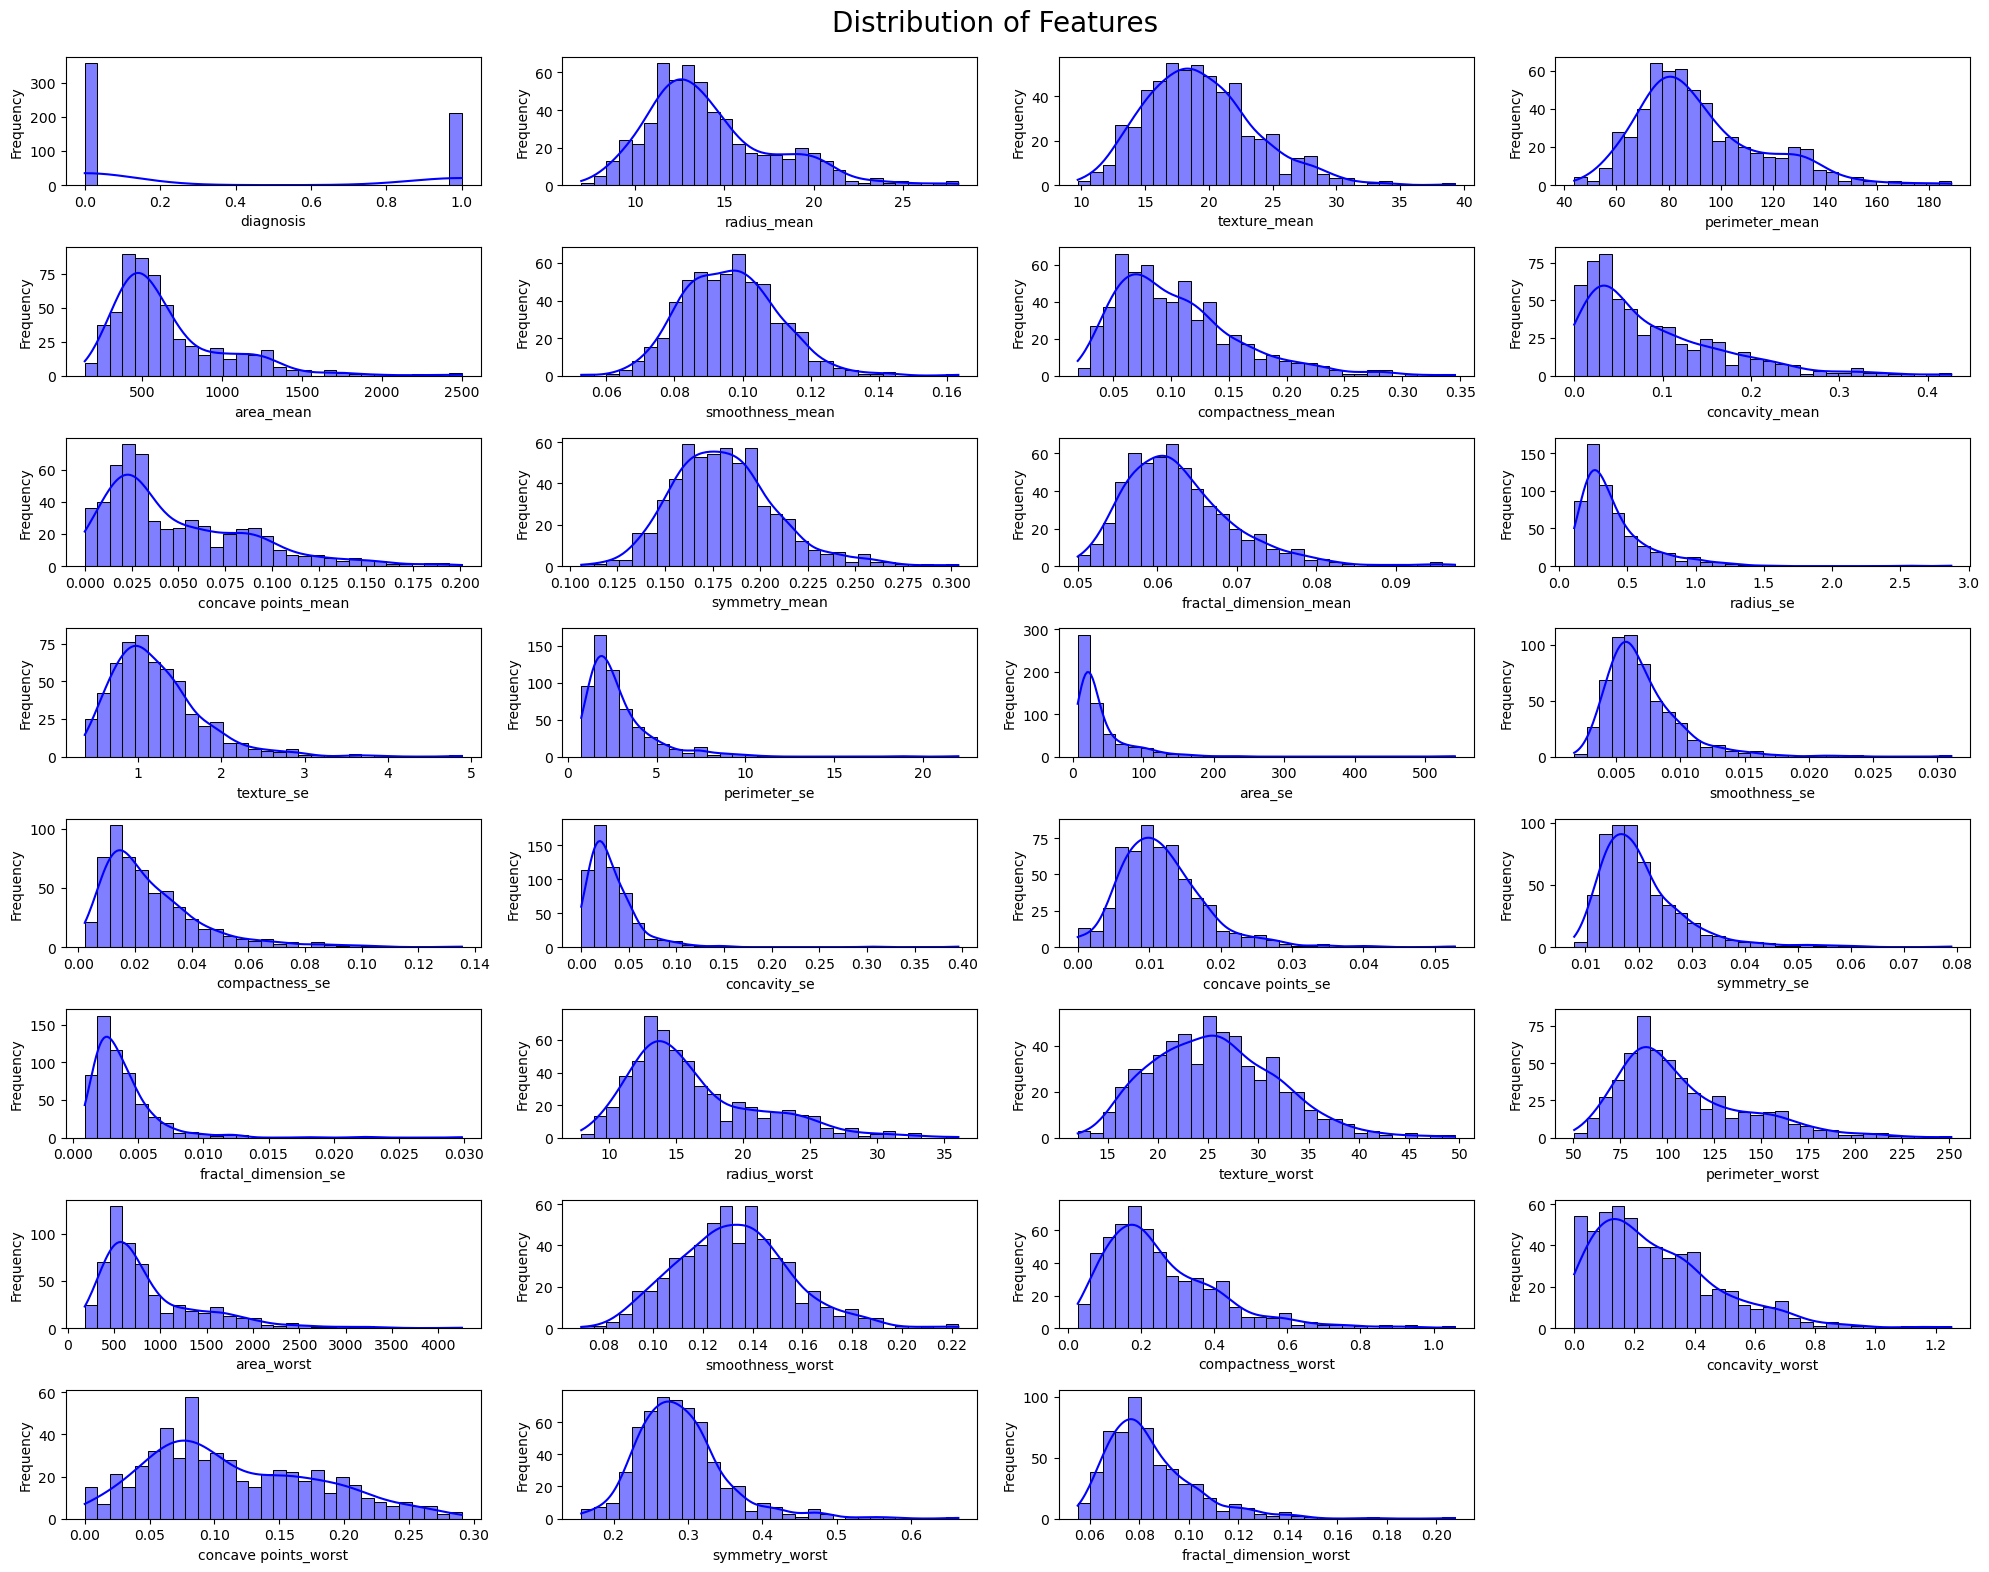

In [9]:
# Distribution of each feature 
num_features = dataset.columns
fig, axes = plt.subplots(nrows=len(num_features)//4 + 1, ncols=4, figsize=(20, 16))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(dataset[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Distribution of Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [10]:
# Extract features and targets
Y = np.array(dataset.diagnosis)
X = np.array(dataset.drop(columns=['diagnosis']))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Evaluation & Training

In [12]:
# Dictionary of models to train
models = {
    "Logistic Regression (Scratch)": LR_from_scratch(learning_rate=0.01, iterations=1000),
    "Logistic Regression (Sklearn)": LogisticRegression()
}

In [13]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Compute performance metrics
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    results[name] = {"Accuracy": acc, "F1-Score": f1}

    print(f"\n{name}:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1-Score: {f1:.2f}")


Logistic Regression (Scratch):
Accuracy: 0.99
F1-Score: 0.98

Logistic Regression (Sklearn):
Accuracy: 0.98
F1-Score: 0.98


In [14]:
# Compare model performance
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Model Performance Comparison:
                               Accuracy  F1-Score
Logistic Regression (Scratch)  0.988304  0.984127
Logistic Regression (Sklearn)  0.982456  0.976378



Best Model: Logistic Regression (Scratch)


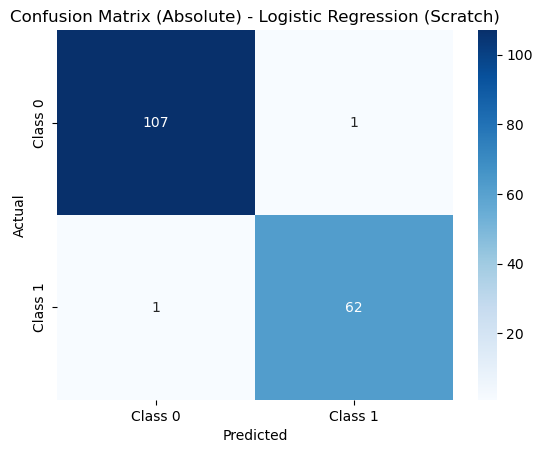

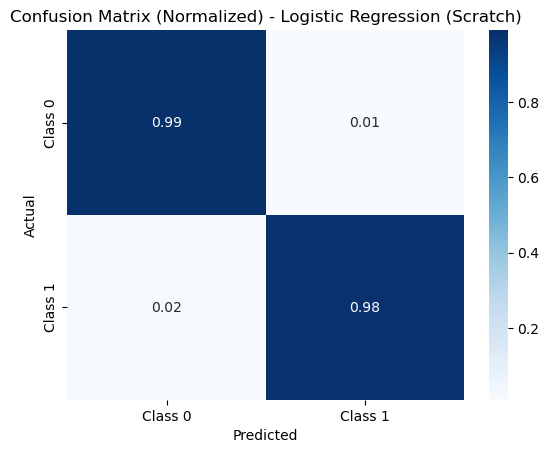

In [15]:
# Visualization of predictions for the best model, Confusion matrix
best_model_name = performance_df["F1-Score"].idxmax()
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, best_pred)

# Plot the confusion matrix (absolute values)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix (Absolute) - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
# Plot the confusion matrix (normalized values)
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix (Normalized) - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

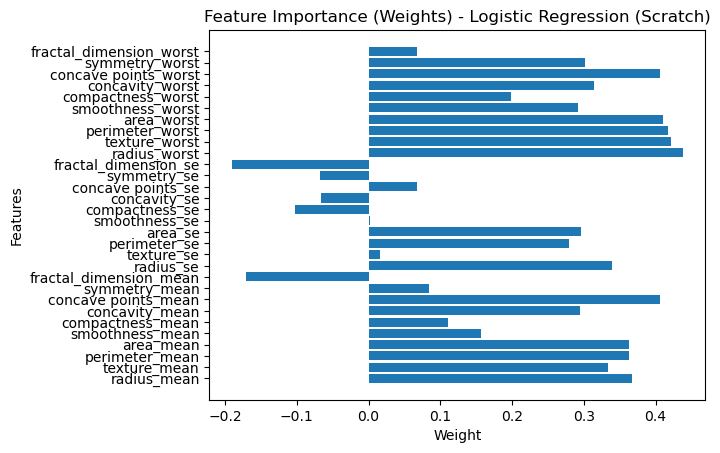

In [16]:
# Plot feature importance (weights)
feature_importance = best_model.W
feature_names = dataset.drop(columns='diagnosis').columns

plt.barh(range(len(feature_importance)), feature_importance, align="center")
plt.yticks(range(len(feature_importance)), feature_names)
plt.title(f"Feature Importance (Weights) - {best_model_name}")
plt.xlabel("Weight")
plt.ylabel("Features")
plt.show()